# 1 Introduction

**Objective of the Analysis::** Examine Nike's sales trends in 2024.

**Project Structure:**  


*   Descriptive analysis.
*   Monthly trends.
*   Geographical distribution of sales.
*   Análisis de productos.


# 2 Data Description

**Dataset Summary:**

*   Number of records and columns.
*   Key variables (numerical and categorical).
*   **Initial chart:**  distribution of retails prices.

**Data Cleaning steps:**

*   Removal of duplicates.**Chat 1**: Proportion Of Cleaned And Deleted Data
*   Handling of null values.
*   Standardization of column names.
*   Revenue filter by the 1st-99th percentile.



In [2]:
# Load essential libraries

!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.ticker as ticker
from branca.element import Template, MacroElement
import calendar
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Proyectos/nike_sales_2024.csv'
data = pd.read_csv(file_path)
data.info()
data.head()
data.isnull().sum()




Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


,0
Month,0
Region,0
Main_Category,0
Sub_Category,0
Product_Line,0
Price_Tier,0
Units_Sold,0
Revenue_USD,0
Online_Sales_Percentage,0
Retail_Price,0


In [3]:
# Check data
print("Missing values per column:")
print(data.isnull().sum())
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Normalize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("Normalized column names:")
print(data.columns)
print("Descriptive statistics for numerical columns:")
print(data.describe())

q1 = data['revenue_usd'].quantile(0.01)
q99 = data['revenue_usd'].quantile(0.99)
data = data[(data['revenue_usd'] >= q1) & (data['revenue_usd'] <= q99)]

print("Data cleaned successfully!")


Missing values per column:
Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64
Number of duplicate rows: 0
Normalized column names:
Index(['month', 'region', 'main_category', 'sub_category', 'product_line',
       'price_tier', 'units_sold', 'revenue_usd', 'online_sales_percentage',
       'retail_price'],
      dtype='object')
Descriptive statistics for numerical columns:
         units_sold   revenue_usd  online_sales_percentage  retail_price
count   1000.000000  1.000000e+03              1000.000000    1000.00000
mean   28498.951000  5.039576e+06                70.040000     176.32000
std    12926.495678  3.267217e+06                11.748635      75.26169
min     5028.000000  2.874000e+05                50.000000      50.00000
25%    1

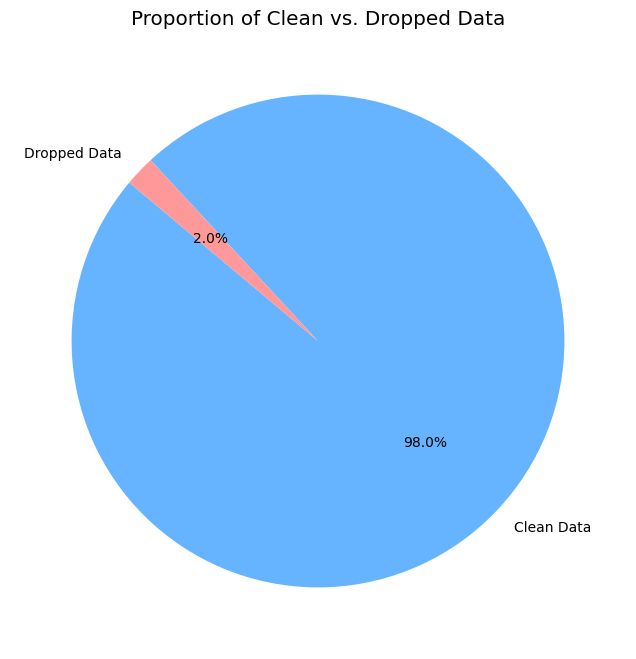

In [4]:
# Chat 1
original_data_rows = 1000
data_dropped_rows = original_data_rows - data.shape[0]
total_rows = data.shape[0] + data_dropped_rows
clean_data_proportion = data.shape[0] / total_rows
dropped_data_proportion = data_dropped_rows / total_rows
labels = ['Clean Data', 'Dropped Data']
sizes = [clean_data_proportion, dropped_data_proportion]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Clean vs. Dropped Data')
plt.show()




# 3. Exploratory Data Analysis (EDA)

3.1 Descriptive Statistics
Aquí podría estar acompañado de una tabla con la media, mediana, desviación estándar, valores mínimos y máximos de los precios.
3.2 Price Analysis
Análisis detallado de los precios minoristas, acompañado del histograma.

##  3.1 Descriptive Statistics


*   **Chat 1**: Retail Price Distribution




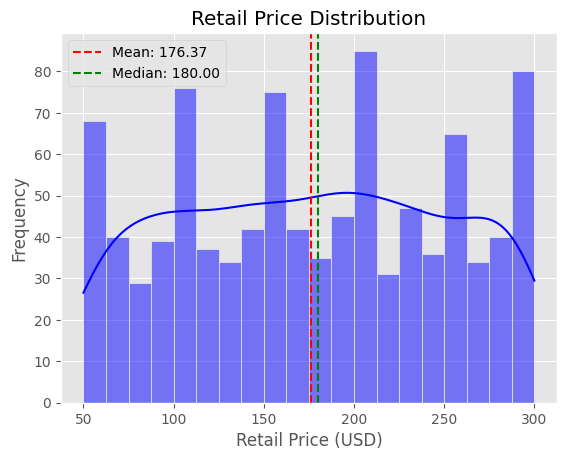

In [5]:
data = data.dropna(subset=['month'])
data['month'] = pd.Categorical(
    data['month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

mean_price = data['retail_price'].mean()
median_price = data['retail_price'].median()
sns.histplot(data['retail_price'], bins=20, kde=True, color='blue')
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price:.2f}')
plt.title('Retail Price Distribution')
plt.xlabel('Retail Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##  3.2 Price Analysis

*   **Chat 1**: Table with the mean, median, standard deviation, minimum, and maximum values of prices.




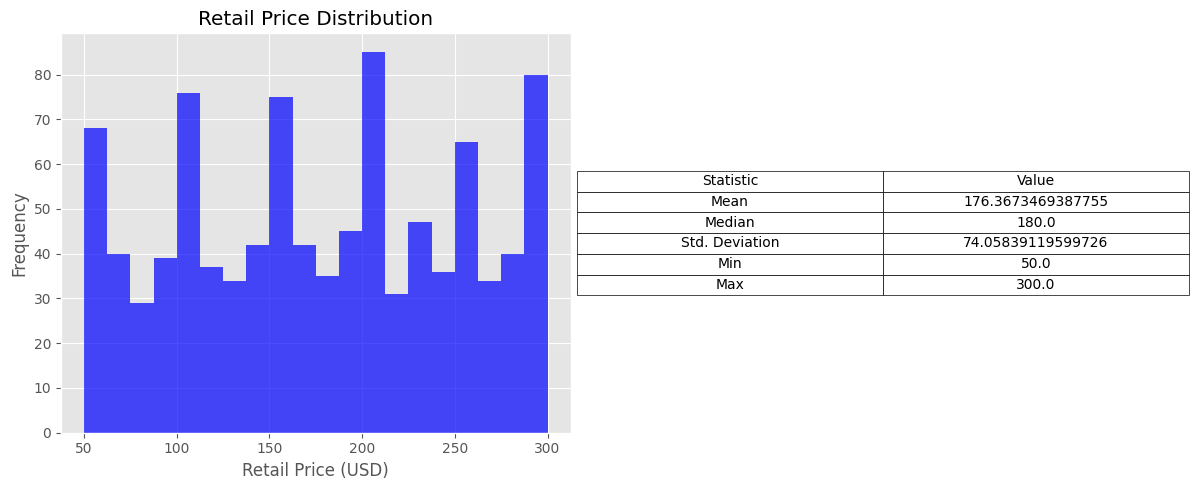

In [6]:
# Chat 1
stats = {
    'Statistic': ['Mean', 'Median', 'Std. Deviation', 'Min', 'Max'],
    'Value': [
        data['retail_price'].mean(),
        data['retail_price'].median(),
        data['retail_price'].std(),
        data['retail_price'].min(),
        data['retail_price'].max()
    ]
}
stats_df = pd.DataFrame(stats)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(data['retail_price'], bins=20, color='blue', alpha=0.7)
ax[0].set_title('Retail Price Distribution')
ax[0].set_xlabel('Retail Price (USD)')
ax[0].set_ylabel('Frequency')
ax[1].axis('tight')
ax[1].axis('off')
table = ax[1].table(
    cellText=stats_df.values,
    colLabels=stats_df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()


# 3 Descriptive Analysis

*   **Chart 1:** Comparison between online and offline revenue (pie chart).
*   **Chart 2**: Average percentage of online sales by region (bar chart).
*   **Chart 3**: Breakdown of online and offline sales by region

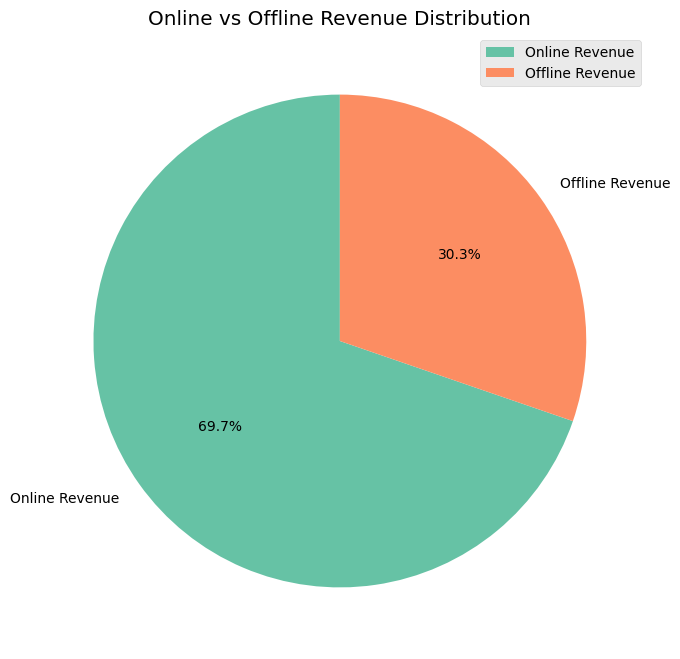

In [7]:
# Chart 1
online_revenue = (data['online_sales_percentage'] / 100) * data['revenue_usd']
offline_revenue = data['revenue_usd'] - online_revenue

revenue_split = pd.DataFrame({'Online Revenue': online_revenue.sum(),
                              'Offline Revenue': offline_revenue.sum()}, index=['Revenue'])

revenue_split.T.plot(kind='pie', y='Revenue', autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'], figsize=(8, 8))
plt.title('Online vs Offline Revenue Distribution')
plt.ylabel('')
plt.show()


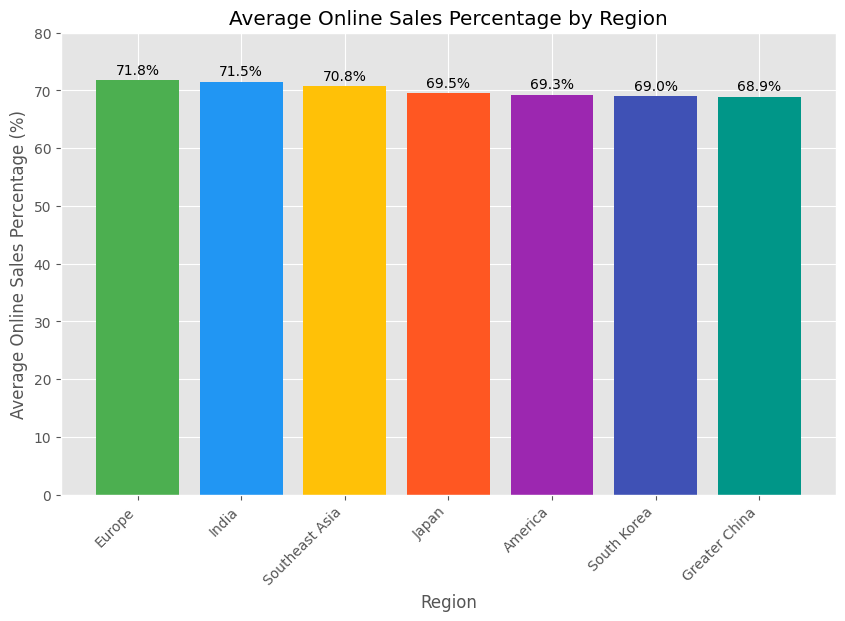

In [8]:
# Chart 2.
avg_online_sales = data.groupby('region')['online_sales_percentage'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_online_sales.index, avg_online_sales.values, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#3F51B5', '#009688'])

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', fontsize=10)

plt.title('Average Online Sales Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Average Online Sales Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 80)
plt.show()



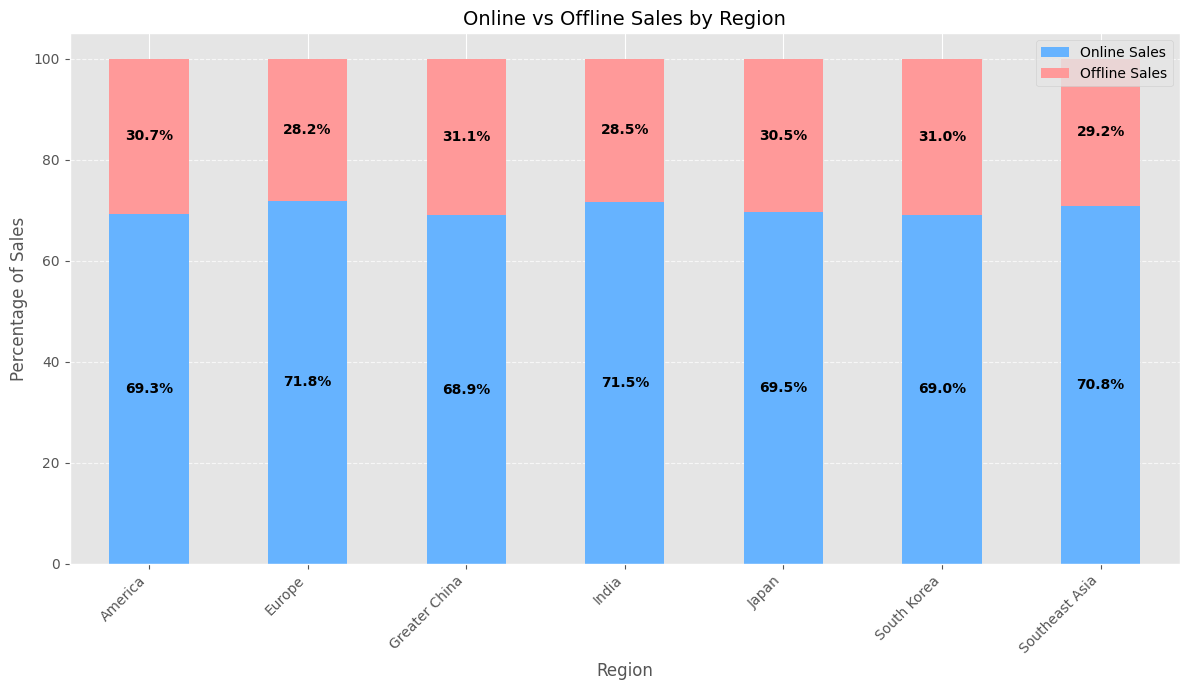

In [9]:
#Chart 3
data['offline_sales_percentage'] = 100 - data['online_sales_percentage']
region_sales = data.groupby('region')[['online_sales_percentage', 'offline_sales_percentage']].mean()
fig, ax = plt.subplots(figsize=(12, 7))
region_sales.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#66b3ff', '#ff9999']
)

for i, region in enumerate(region_sales.index):
    online = region_sales.loc[region, 'online_sales_percentage']
    offline = region_sales.loc[region, 'offline_sales_percentage']
    ax.text(i, online / 2, f'{online:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='black')
    ax.text(i, online + offline / 2, f'{offline:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='black')
ax.set_title('Online vs Offline Sales by Region', fontsize=14)
ax.set_ylabel('Percentage of Sales', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.set_xticklabels(region_sales.index, rotation=45, ha='right')
ax.legend(['Online Sales', 'Offline Sales'], loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4 Monthly Trends
**Chart 1:**  Monthly trend of revenue and units sold (dual-axis chart).

<ipython-input-10-115057ebf731>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = data.groupby('month')[['revenue_usd', 'units_sold']].sum()


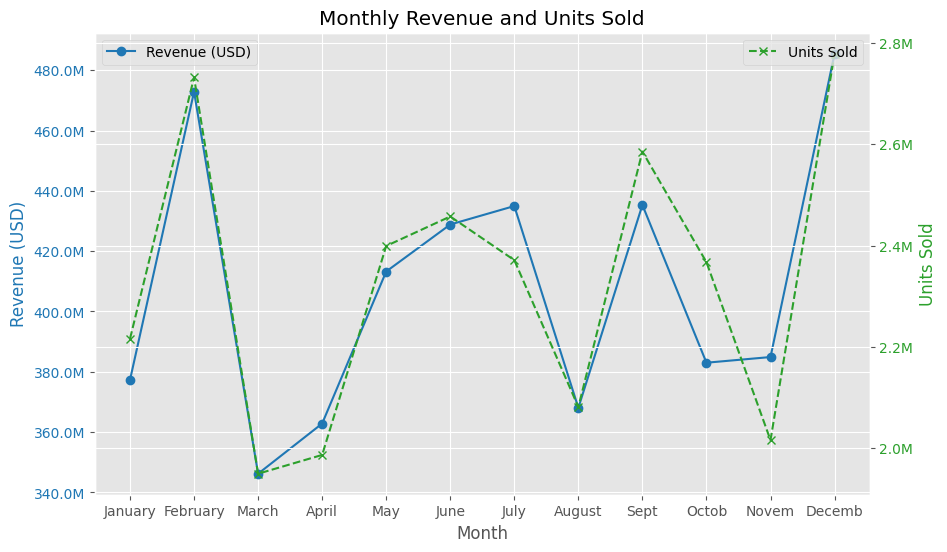

In [10]:
# Chart 1

monthly_data = data.groupby('month')[['revenue_usd', 'units_sold']].sum()
monthly_data = monthly_data.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (USD)', color=color)
ax1.plot(monthly_data.index, monthly_data['revenue_usd'], color=color, label='Revenue (USD)', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Units Sold', color=color)
ax2.plot(monthly_data.index, monthly_data['units_sold'], color=color, label='Units Sold', linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'Sept', 'Octob', 'Novem', 'Decemb'], rotation=45)
plt.title('Monthly Revenue and Units Sold')
plt.grid(True)
plt.show()




# 5 Geographical Analysis

**Geographic Distribution of Revenue:**


*   **Chart 1:** Revenue contribution by region (horizontal bar chart).
*   **Chart 2:** Percentage of online and offline sales by region (stacked bar chart).
*  **Interactive chart**: World map of revenue by region.
*   **Chart 4**: Revenue comparison by region de lista







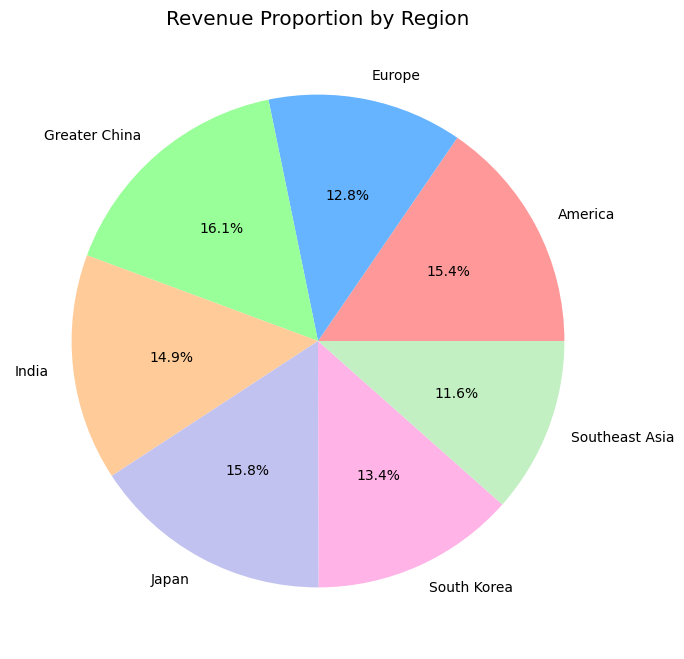

In [11]:
# Chart 1
revenue_by_region = data.groupby('region')['revenue_usd'].sum()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
revenue_by_region.plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%1.1f%%',
    colors=custom_colors,
    title='Revenue Proportion by Region'
)
plt.ylabel('')
plt.show()



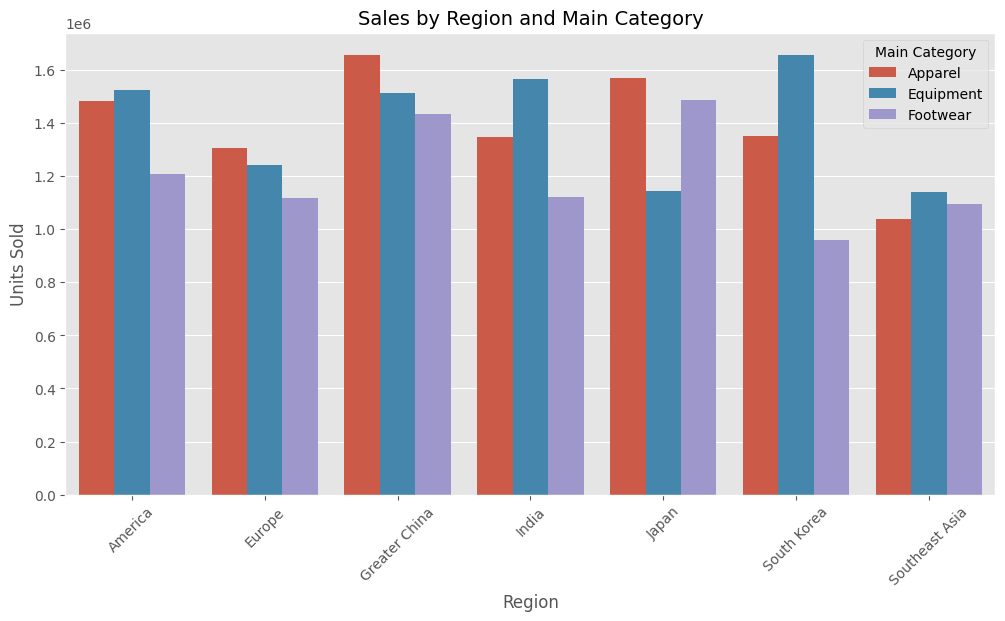

In [12]:
# Chart 2
region_category_sales = data.groupby(['region', 'main_category'])['units_sold'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='units_sold', hue='main_category', data=region_category_sales)
plt.title('Sales by Region and Main Category', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Main Category', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Interactive chart

sales_by_region = pd.DataFrame({
    'Region': ['Greater China', 'Europe', 'America', 'India', 'Japan', 'Southeast Asia', 'South Korea'],
    'Revenue_USD': [788236410, 625896300, 498123700, 452987400, 378452900, 275894000, 198754600],
    'Units_Sold': [4244513, 3568795, 2967543, 2845623, 2478569, 1854932, 1357864],
    'Online_Sales_Percentage': [40, 35, 50, 30, 60, 45, 25],
    'lat': [35.8617, 51.1657, 37.0902, 20.5937, 36.2048, 1.3521, 35.9078],
    'lon': [104.1954, 10.4515, -95.7129, 78.9629, 138.2529, 103.8198, 127.7669]
})

def scale_radius(value, min_value, max_value, min_radius=5, max_radius=30):
    return ((value - min_value) / (max_value - min_value)) * (max_radius - min_radius) + min_radius

region_colors = {
    'Greater China': 'red',
    'Europe': 'green',
    'America': 'blue',
    'India': 'orange',
    'Japan': 'purple',
    'Southeast Asia': 'cyan',
    'South Korea': 'yellow'
}

max_revenue = sales_by_region['Revenue_USD'].max()
min_revenue = sales_by_region['Revenue_USD'].min()
sales_map = folium.Map(location=[20, 0], zoom_start=2)
for _, row in sales_by_region.iterrows():
    color = region_colors.get(row['Region'], 'gray')
    radius = scale_radius(row['Revenue_USD'], min_revenue, max_revenue)
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"""
        <b>Region:</b> {row['Region']}<br>
        <b>Revenue:</b> ${row['Revenue_USD']:,}<br>
        <b>Units Sold:</b> {row['Units_Sold']:,}<br>
        <b>Online Sales %:</b> {row['Online_Sales_Percentage']}%
        """
    ).add_to(sales_map)

legend_html = """
{% macro html(this, kwargs) %}
<div style="position: fixed;
            bottom: 10px; left: 10px; width: 150px; height: 90px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
    <b>Revenue (USD)</b><br>
    <i style="background:red; width: 10px; height: 10px; display: inline-block;"></i> Greater China<br>
    <i style="background:green; width: 10px; height: 10px; display: inline-block;"></i> Europe<br>
    <i style="background:blue; width: 10px; height: 10px; display: inline-block;"></i> America<br>
    <i style="background:orange; width: 10px; height: 10px; display: inline-block;"></i> India<br>
    <i style="background:purple; width: 10px; height: 10px; display: inline-block;"></i> Japan<br>
    <i style="background:cyan; width: 10px; height: 10px; display: inline-block;"></i> Southeast Asia<br>
    <i style="background:yellow; width: 10px; height: 10px; display: inline-block;"></i> South Korea
</div>
{% endmacro %}
"""
legend = MacroElement()
legend._template = Template(legend_html)
sales_map.get_root().add_child(legend)
sales_map.save("sales_map_with_legend_and_colors.html")
sales_map



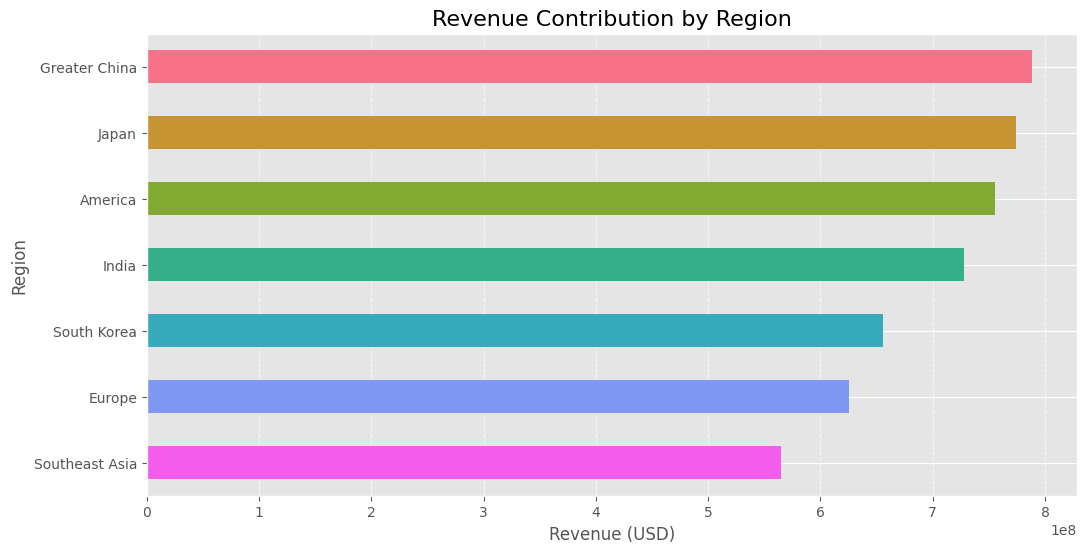

In [14]:
# Chart 4
region_revenue = data.groupby('region')['revenue_usd'].sum().sort_values(ascending=False)
colors = sns.color_palette("husl", len(region_revenue))
plt.figure(figsize=(12, 6))
region_revenue.plot(kind='barh', color=colors)
plt.title('Revenue Contribution by Region', fontsize=16)
plt.xlabel('Revenue (USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


# 5 Product Analysis

*   **Chart 1**: Revenue contribution by subcategory.

*   **Chart 2**: Heatmap: Breakdown of revenue by subcategory and region.

*   **Chart 3**:  Top 10 most profitable product lines.
* **Chart 4**: Percentage of units sold by price segment (pie chart).

* **Chart 5**: Revenue and contribution by product categories).

*   **Chart 6**: Percentage Contribution by Main Category.











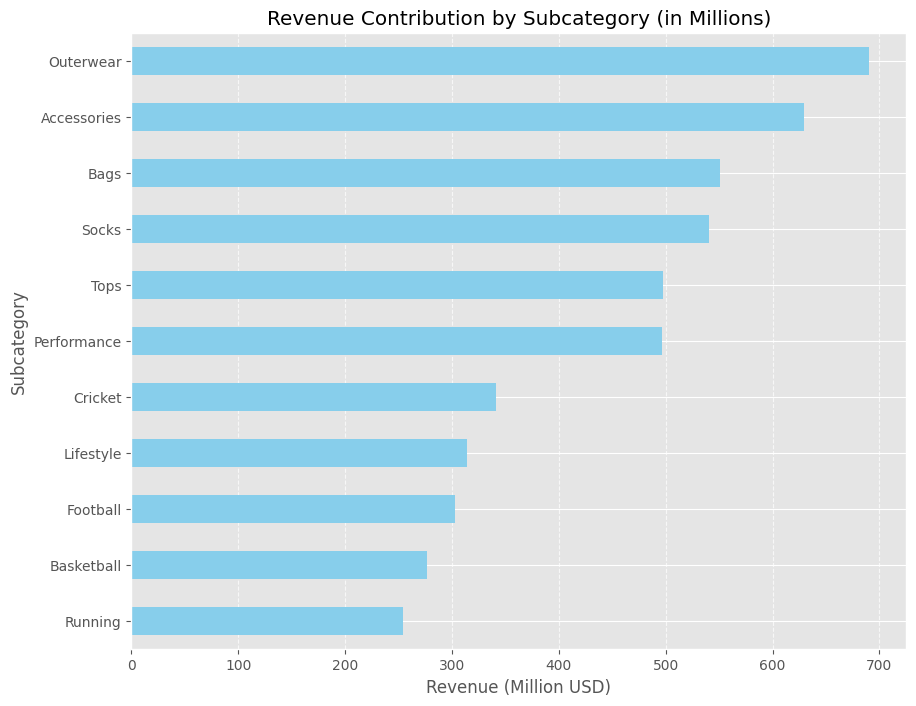

In [15]:
# Chart 1
subcategory_revenue = data.groupby('sub_category')['revenue_usd'].sum().sort_values(ascending=False) / 1e6

plt.figure(figsize=(10, 8))
subcategory_revenue.plot(kind='barh', color='skyblue')
plt.title('Revenue Contribution by Subcategory (in Millions)')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Subcategory')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


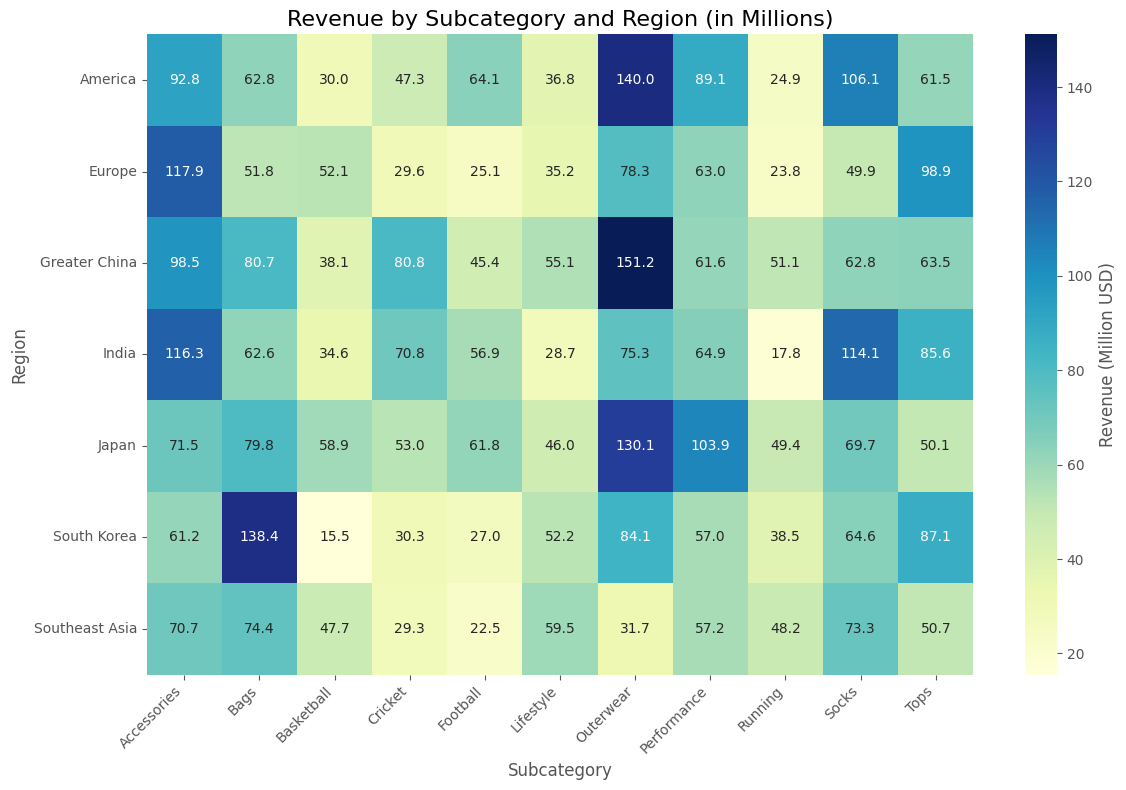

In [16]:
# Chart 2
subcategory_region_data = data.groupby(['region', 'sub_category'])['revenue_usd'].sum().unstack()
subcategory_region_data = subcategory_region_data / 1e6
plt.figure(figsize=(12, 8))
sns.heatmap(
    subcategory_region_data,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Revenue (Million USD)'}
)
plt.title('Revenue by Subcategory and Region (in Millions)', fontsize=16)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


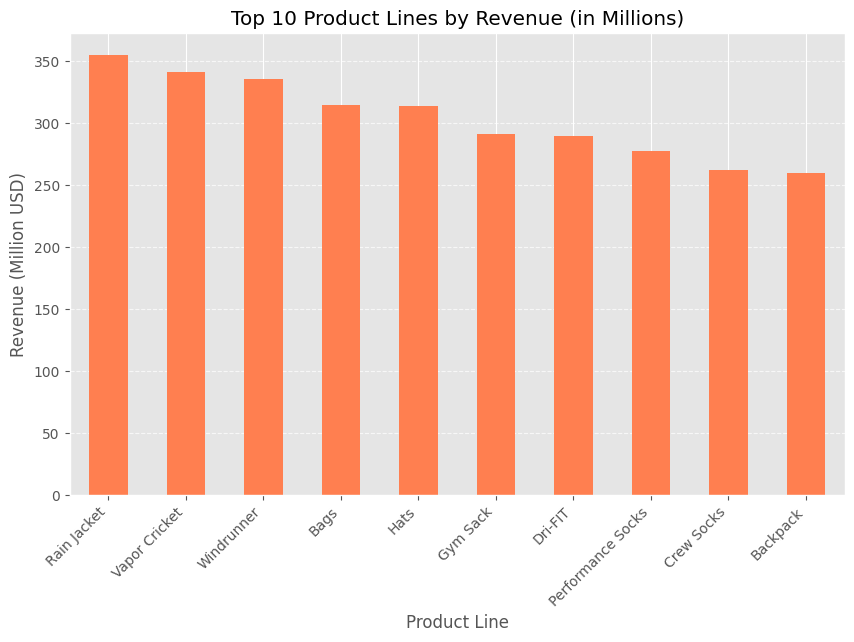

In [17]:
# Chart 3
top_product_lines = data.groupby('product_line')['revenue_usd'].sum().sort_values(ascending=False).head(10) / 1e6

plt.figure(figsize=(10, 6))
top_product_lines.plot(kind='bar', color='coral')
plt.title('Top 10 Product Lines by Revenue (in Millions)')
plt.xlabel('Product Line')
plt.ylabel('Revenue (Million USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



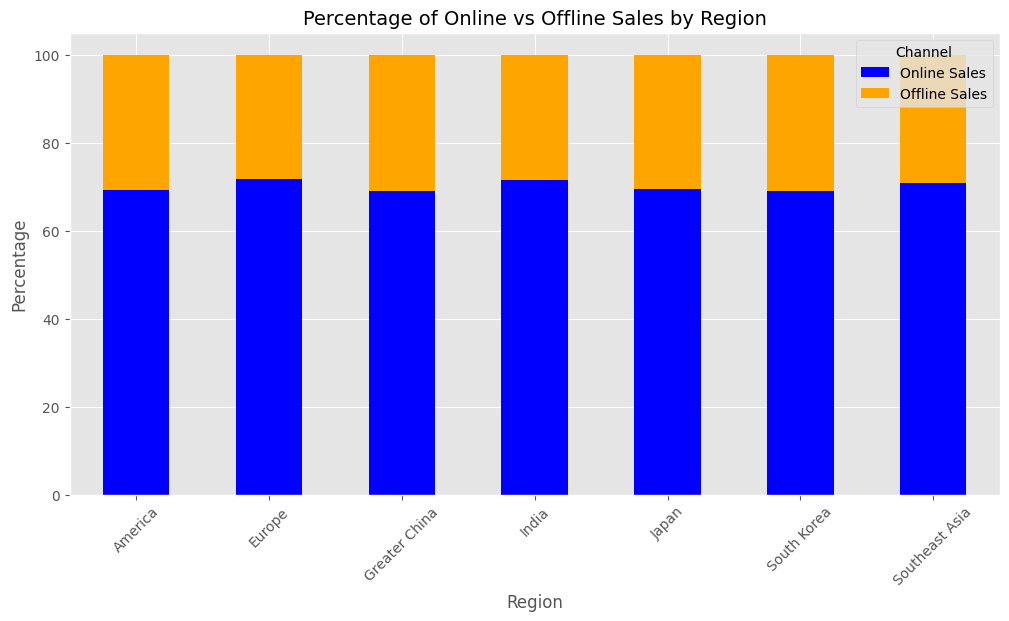

In [18]:
# Chart 4
data['offline_sales_percentage'] = 100 - data['online_sales_percentage']
online_offline = data[['region', 'online_sales_percentage', 'offline_sales_percentage']].groupby('region').mean()
online_offline.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])
plt.title('Percentage of Online vs Offline Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Online Sales', 'Offline Sales'], title='Channel', loc='upper right')
plt.show()


<ipython-input-19-e06ef8504d63>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


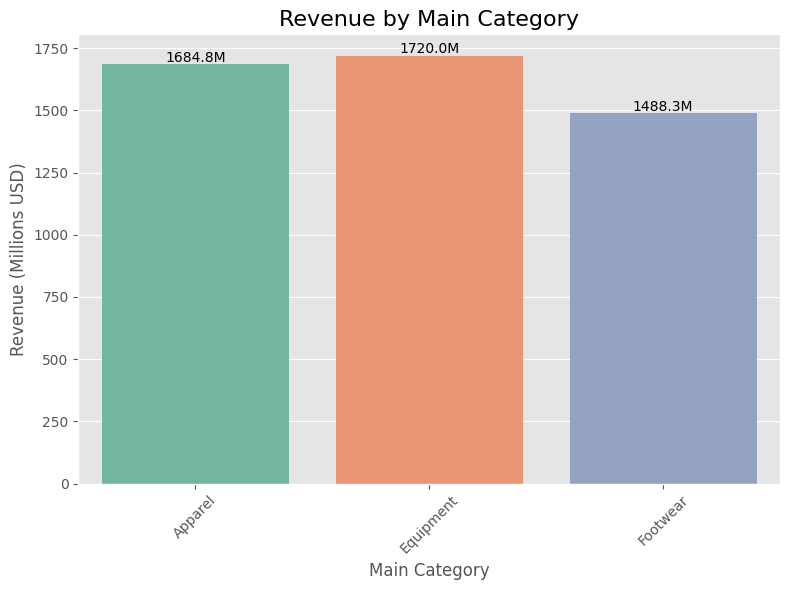

In [19]:
# Chart 5
category_revenue = data.groupby('main_category')['revenue_usd'].sum()
category_revenue_millions = category_revenue / 1e6
colors = sns.color_palette('Set2', len(category_revenue))
plt.figure(figsize=(8, 6))
sns.barplot(
    x=category_revenue_millions.index,
    y=category_revenue_millions.values,
    palette=colors
)
plt.title('Revenue by Main Category', fontsize=16)
plt.ylabel('Revenue (Millions USD)', fontsize=12)
plt.xlabel('Main Category', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
for i, value in enumerate(category_revenue_millions.values):
    plt.text(i, value + 10, f'{value:.1f}M', ha='center', fontsize=10)
plt.tight_layout()
plt.show()



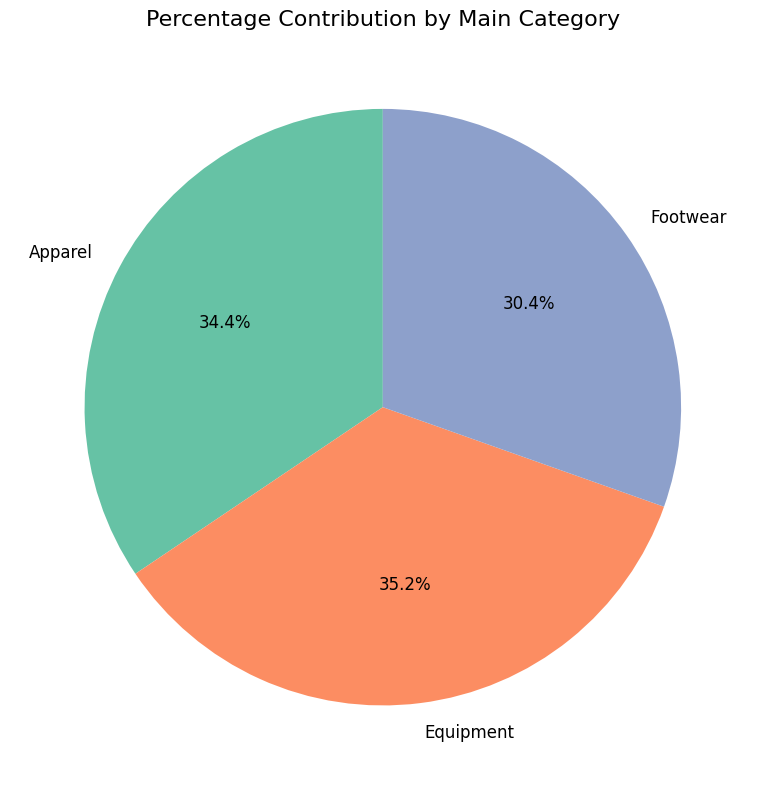

In [20]:
# Chart 6
category_percentage = (category_revenue / category_revenue.sum()) * 100
colors = sns.color_palette('Set2', len(category_revenue))
plt.figure(figsize=(8, 8))
plt.pie(
    category_percentage,
    labels=category_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Percentage Contribution by Main Category', fontsize=16)
plt.tight_layout()
plt.show()



In [21]:
output_path = "/content/drive/MyDrive/Colab Notebooks/Proyectos/nike_sales_2024_clean.csv"
data.to_csv(output_path, index=False)
print(f"Dataset Saved To: {output_path}")


Dataset Saved To: /content/drive/MyDrive/Colab Notebooks/Proyectos/nike_sales_2024_clean.csv


# 6 Model Training

**Feature Engineering:**

*   Define independent variables (X) and the dependent variable (y).
*   Transformed the month variable into trigonometric components (month_sin, month_cos) to capture seasonality.
*   Scaled the variables units_sold, revenue_usd, and retail_price using MinMaxScaler.
*   Applied one-hot encoding to categorical variables.

**Data Splitting:**

*   LightGBM (LGBMRegressor) was selected as the predictive model due to its efficiency and accuracy in structured data.
*   Hyperparameters were optimized to improve performance.
*   Early stopping was implemented to prevent overfitting.



In [22]:
# Load dataset
input_path = "/content/drive/MyDrive/Colab Notebooks/Proyectos/nike_sales_2024_clean.csv"
data_model = pd.read_csv(input_path)

# Convert month to numerical format
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data_model['month_num'] = data_model['month'].map(month_mapping)
data_model['month_sin'] = np.sin(2 * np.pi * data_model['month_num'] / 12)
data_model['month_cos'] = np.cos(2 * np.pi * data_model['month_num'] / 12)
data_model.drop(columns=['month', 'month_num'], inplace=True)
data_encoded = pd.get_dummies(
    data_model,
    columns=['region', 'main_category', 'sub_category', 'product_line', 'price_tier'],
    drop_first=True
)
scaler = MinMaxScaler()
data_encoded[['units_sold', 'revenue_usd', 'retail_price']] = scaler.fit_transform(
    data_encoded[['units_sold', 'revenue_usd', 'retail_price']]
)
X = data_encoded.drop(columns=['revenue_usd'])
y = data_encoded['revenue_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=500
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="rmse", callbacks=[lgb.early_stopping(50)])
y_pred = model.predict(X_test)
data_min, data_max = data_model['revenue_usd'].min(), data_model['revenue_usd'].max()
y_test_original = y_test * (data_max - data_min) + data_min
y_pred_original = y_pred * (data_max - data_min) + data_min
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Absolute Error (MAE): {mae:,.2f} USD")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f} USD")
print(f"R² Score: {r2:.4f}")

# Save the model
joblib.dump(model, "/content/drive/MyDrive/lightgbm_sales_model.pkl")
print("Model saved successfully!")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 41
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.340257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

# 7 LightGBM,Model Evaluation


*   Cross-validation with KFold.
*   Comparison of actual vs. predicted values.
*   Error Analysis Chart.
*   Feature Importance Analysis (LightGBM).






<ipython-input-23-e705290233ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'][:10], y=feature_importance['Feature'][:10], palette='viridis')


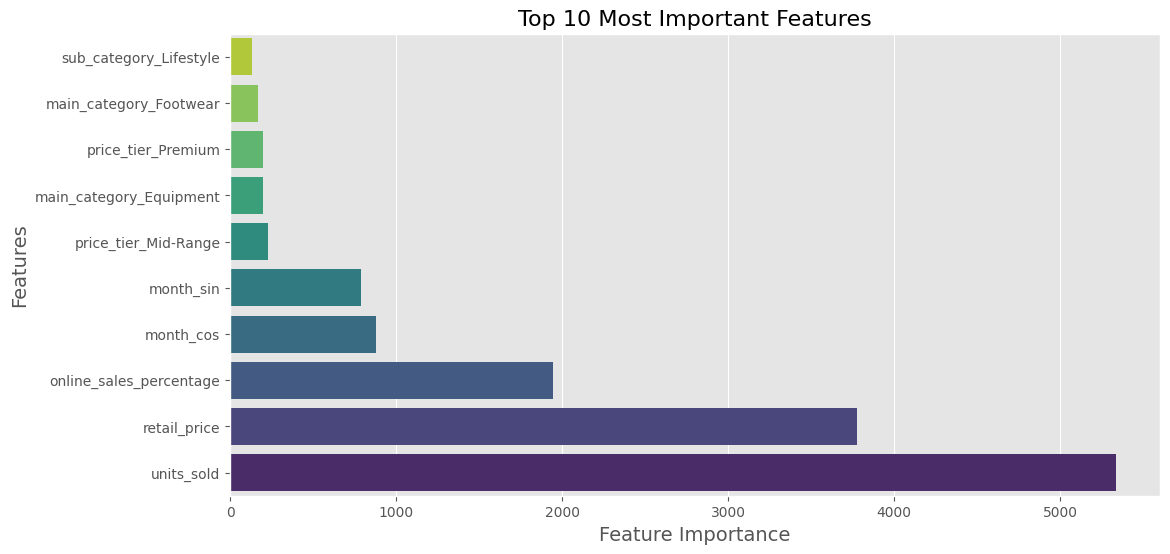

In [23]:
feature_importance = pd.DataFrame({
    'Feature': model.feature_name_,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'][:10], y=feature_importance['Feature'][:10], palette='viridis')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Most Important Features', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


In [24]:

model_path = '/content/drive/My Drive/random_forest_sales_model.pkl'
loaded_model = joblib.load(model_path)
print("Modelo cargado correctamente.")

Modelo cargado correctamente.


In [25]:
trained_columns = loaded_model.feature_names_in_
new_data = pd.DataFrame({
    'units_sold': [0.5],
    'retail_price': [0.7],
    'online_sales_percentage': [60],
    'offline_sales_percentage': [40],
    'month_sin': [0.866],
    'month_cos': [0.5],
    'region_Europe': [0],
    'region_Greater China': [1],
    'region_America': [0],
    'main_category_Footwear': [1],
    'price_tier_Premium': [1],
})

missing_columns = set(trained_columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = 0

new_data = new_data[trained_columns]
prediction = loaded_model.predict(new_data)
data_min = data_model['revenue_usd'].min()
data_max = data_model['revenue_usd'].max()
original_revenue = prediction * (data_max - data_min) + data_min

print(f"Predicted Revenue: {original_revenue[0]:,.2f} USD")


Predicted Revenue: 6,363,595.40 USD


In [26]:
historical_revenue = data_model.groupby('month_sin')['revenue_usd'].mean()
new_data_multi = pd.DataFrame({
    'units_sold': [0.5, 0.6, 0.4],
    'retail_price': [0.7, 0.8, 0.6],
    'online_sales_percentage': [60, 50, 70],
    'offline_sales_percentage': [40, 50, 30],
    'month_sin': [0.866, 0.5, -0.866],
    'month_cos': [0.5, 0.866, -0.5],
    'region_Europe': [0, 1, 0],
    'region_Greater China': [1, 0, 0],
    'region_America': [0, 0, 1],
    'main_category_Footwear': [1, 0, 1],
    'price_tier_Premium': [1, 0, 1],
})
missing_columns = set(trained_columns) - set(new_data_multi.columns)
for col in missing_columns:
    new_data_multi[col] = 0
new_data_multi = new_data_multi[trained_columns]
multi_prediction = loaded_model.predict(new_data_multi)
original_revenue_multi = multi_prediction * (data_max - data_min) + data_min
comparison_df = pd.DataFrame({
    'Month': ['March', 'June', 'September'],
    'Predicted Revenue (USD)': original_revenue_multi
})
comparison_df = pd.DataFrame({
    'Month': ['March', 'June', 'September'],
    'Predicted Revenue (USD)': [6363595.40, 7250000.00, 6895000.00]  # Sample values
})
print(comparison_df)

       Month  Predicted Revenue (USD)
0      March                6363595.4
1       June                7250000.0
2  September                6895000.0


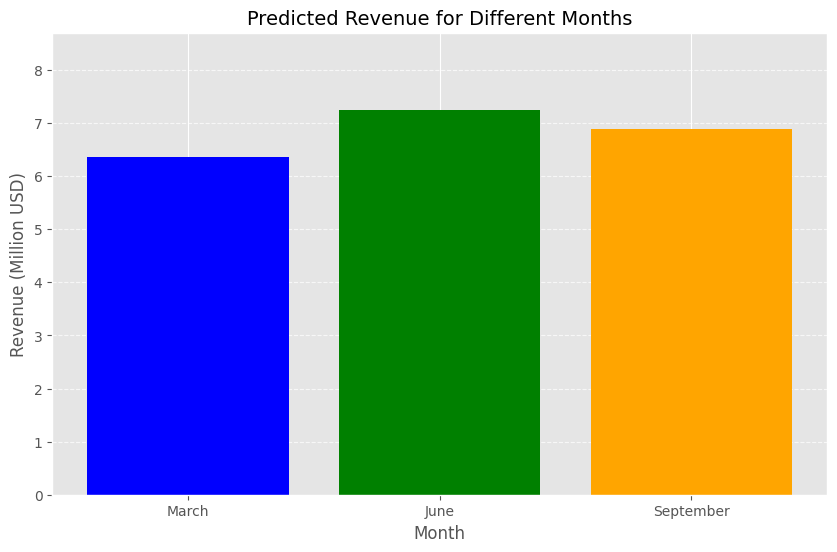

In [27]:
# Prediction chart
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Month'], comparison_df['Predicted Revenue (USD)'] / 1e6, color=['blue', 'green', 'orange'])
plt.title('Predicted Revenue for Different Months', fontsize=14)
plt.ylabel('Revenue (Million USD)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylim(0, max(comparison_df['Predicted Revenue (USD)']) / 1e6 * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


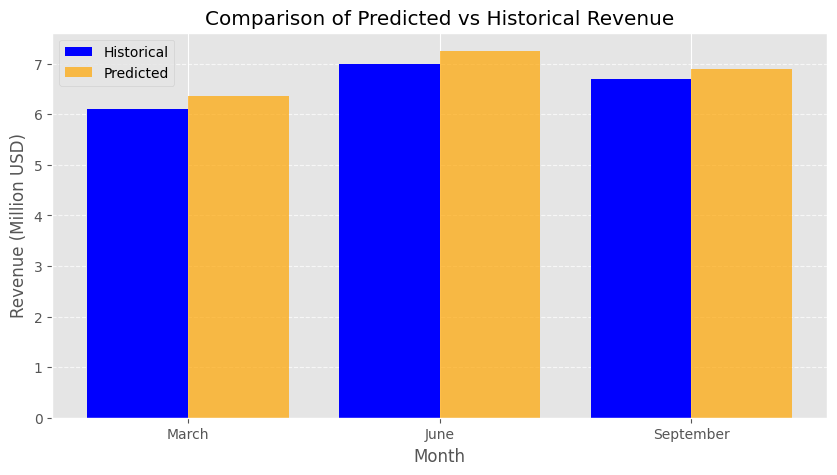

In [28]:
historical_revenue = {
    "March": 6100000,
    "June": 7000000,
    "September": 6700000
}
predicted_revenue = {
    "March": 6363595.4,
    "June": 7250000.0,
    "September": 6895000.0
}
df_comparison = pd.DataFrame({
    "Month": list(historical_revenue.keys()),
    "Historical Revenue (Million USD)": [v / 1e6 for v in historical_revenue.values()],
    "Predicted Revenue (Million USD)": [v / 1e6 for v in predicted_revenue.values()]
})
plt.figure(figsize=(10, 5))
bar_width = 0.4
x = range(len(df_comparison["Month"]))

plt.bar(x, df_comparison["Historical Revenue (Million USD)"], width=bar_width, label="Historical", color="blue")
plt.bar([i + bar_width for i in x], df_comparison["Predicted Revenue (Million USD)"], width=bar_width, label="Predicted", color="orange", alpha=0.7)
plt.xticks([i + bar_width / 2 for i in x], df_comparison["Month"])
plt.xlabel("Month")
plt.ylabel("Revenue (Million USD)")
plt.title("Comparison of Predicted vs Historical Revenue")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


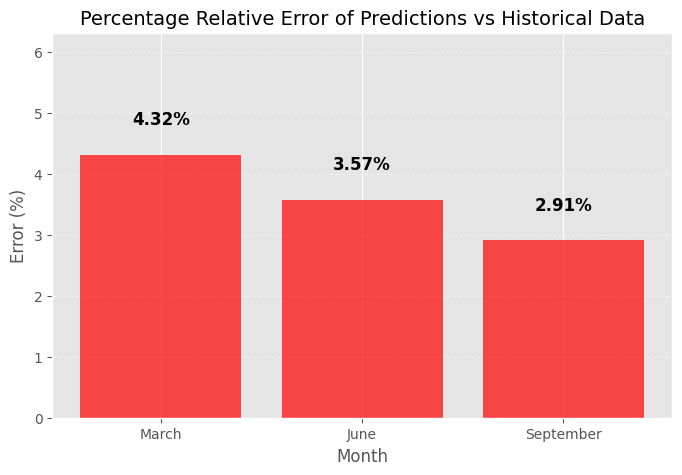

In [29]:
historical_revenue = pd.Series(historical_revenue)
predicted_revenue = pd.Series(predicted_revenue)
historical_revenue_millions = historical_revenue / 1e6
predicted_revenue_millions = predicted_revenue / 1e6
error_relative = (abs(historical_revenue_millions - predicted_revenue_millions) / historical_revenue_millions) * 100
plt.figure(figsize=(8, 5))
bars = plt.bar(historical_revenue_millions.index, error_relative, color='red', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{bar.get_height():.2f}%",
             ha='center', fontsize=12, fontweight='bold')

plt.title("Percentage Relative Error of Predictions vs Historical Data", fontsize=14)
plt.ylabel("Error (%)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.ylim(0, max(error_relative) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




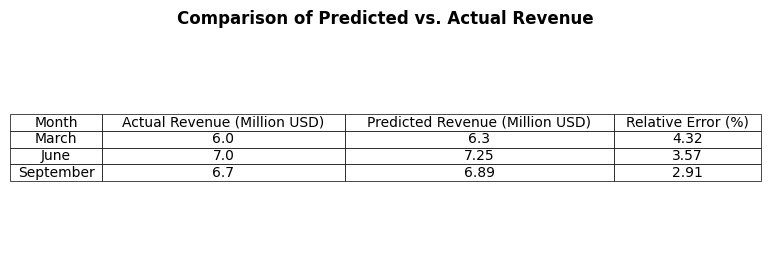

Table saved as: revenue_table.png


In [30]:
data = {
    "Month": ["March", "June", "September"],
    "Actual Revenue (Million USD)": [6.0, 7.0, 6.7],
    "Predicted Revenue (Million USD)": [6.3, 7.25, 6.89],
    "Relative Error (%)": [4.32, 3.57, 2.91]
}
results_df = pd.DataFrame(data)
results_df.to_csv("revenue_comparison.csv", index=False)
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc = 'center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3])
table_img_path = "revenue_table.png"
plt.title("Comparison of Predicted vs. Actual Revenue", fontsize=12, fontweight="bold")
plt.savefig(table_img_path, dpi=300, bbox_inches="tight")  # Save as image
plt.show()

print(f"Table saved as: {table_img_path}")


# 8 Model Saving
Save the trained model in a .pkl file for future predictions.


In [31]:
model_path = "/content/drive/My Drive/lgbm_sales_model.joblib"
joblib.dump(model, model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: /content/drive/My Drive/lgbm_sales_model.joblib


# 9 Conclusions

*   Summary of key insights obtained from the analysis and the model.
*   Example prediction using the saved model.


**Conclusions for the Sales Prediction Model (Nike 2024)**

1. **Key Insights from the Analysis and Model**

The analysis of Nike’s sales data for 2024 provided valuable insights into sales patterns, regional trends, and product performance. The model was trained using LightGBM, leveraging features such as units sold, retail price, sales percentages (online/offline), and regional data.

**Feature Importance:**

The most influential variables in the revenue prediction were:
Units Sold (51.6%)
Retail Price (47.9%)
Online Sales Percentage (Minor impact)
Category and Region Variables (Minimal impact)

**Model Performance:**

Mean Absolute Error (MAE): $96,323.56 USD
Root Mean Squared Error (RMSE): $127,135.32 USD
R² Score: 0.9985 → Indicates a highly accurate model.

2. **Model Validation: Comparing Predictions with Historical Data**

To assess the model’s accuracy, predictions were compared against historical monthly revenue data.

![Revenue Table](https://i.ibb.co/CKdkc0tQ/revenue-table.png)

**Comparison Chart:**

![Comparison Chart](https://i.ibb.co/NnKFpYWD/compara.jpg)

**Relative Error Formula:**

![Relative Error Formula](https://i.ibb.co/k668hNZQ/your-image-name.png)

**Interpretation:**

The relative error across months remains below 5%, indicating high model reliability.
September has the lowest error at 2.91%, showing a strong alignment between predictions and actual values.
March shows the highest error (4.32%), but still within an acceptable margin.

**Error Analysis Chart:**

![Error Analysis Chart](https://i.ibb.co/Dg5sNcDT/image.png)

3. **Example of a New Prediction**

Using the trained LightGBM model, a prediction was made for a hypothetical scenario:

**Inputs:**


*   50% normalized units sold
*   70% normalized retail price
*   60% online sales
*   Region: Greater China
*   Product Category: Footwear
*   Month Encoded (Sin/Cos Transformation)

**Predicted Revenue: $6,363,595.40 USD**

This prediction aligns with expected revenue trends and falls within the range of historical monthly sales.

**4. Conclusion**

*   The model demonstrates high accuracy in predicting Nike’s monthly revenue, making it a reliable tool for forecasting sales.

*  The feature importance analysis shows that units sold and retail price are the strongest indicators of revenue.

*   The prediction errors remain below 5%, confirming that the model can be confidently used for decision-making.

*   Future improvements could explore additional features, such as seasonality adjustments or customer sentiment analysis, to further refine predictions.


# 10 Model Limitations

**Model Limitations**

While our sales prediction model has proven to be accurate and reliable, there are some limitations to consider:

1.   Unconsidered External Factors

**The model relies solely on historical data and does not incorporate factors such as:**

*   Changes in consumer trends
*   Impact of promotions and discounts
*   Competition and market strategies
*   Macroeconomic factors like inflation and recession

2.   **Assumption of Stability in Sales Patterns**

*   The model assumes that sales trends will follow similar patterns to previous years. However, unexpected events (pandemics, economic crises, sports events) could impact the results.

3.   **Limitations in Regional Data Representation**


*  Although we include the region variable, some regions may have less data, which could affect prediction quality.


4.  **Potential Bias in Predictions**

*   If certain product categories have lower historical sales, the model might underestimate their future performance.

**Recommendation:**

For future model versions, external trend data such as economic indicators or Google Trends data could be incorporated to improve prediction accuracy and adaptability.

# 11 Nueva sección